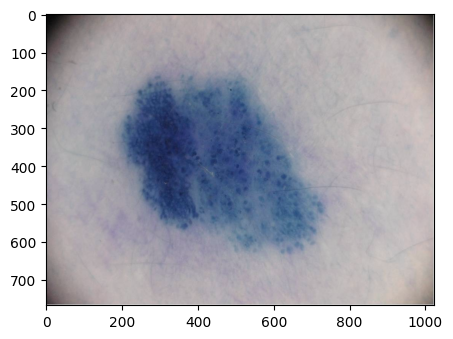

In [15]:
import matplotlib.pyplot as plt
import cv2

mask_path = '/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000009_segmentation.png'
image_loc = '/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0000009.jpg'

image = cv2.imread(image_loc, cv2.COLOR_RGB2BGR)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(image)

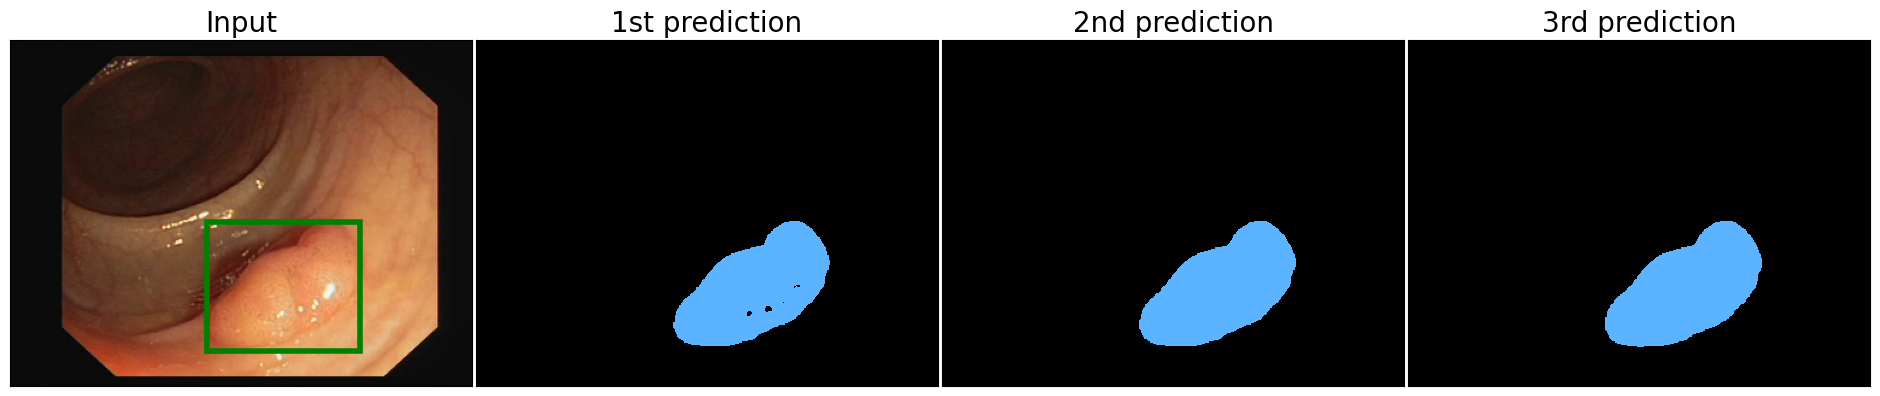

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor
from utils import utils
from matplotlib.colors import ListedColormap

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def calculate_dice(mask1, mask2):
    """
    Calcula o coeficiente DICE entre duas máscaras binárias.
    
    Args:
        mask1: uma matriz NumPy que representa a primeira máscara binária.
        mask2: uma matriz NumPy que representa a segunda máscara binária.
    
    Returns:
        O coeficiente DICE como um valor float entre 0 e 1.
    """
    
    # Calcula o número de pixels de sobreposição
    overlap = np.logical_and(mask1, mask2).sum()

    # Calcula o número total de pixels nas duas máscaras
    total_pixels = mask1.sum() + mask2.sum()

    # Calcula o coeficiente DICE
    dice = 2 * overlap / total_pixels
    
    return dice

#mask_path = '/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0010231_segmentation.png'
#image_loc = '/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0010231.jpg'

mask_path = '/mnt/B-SSD/maltamed/datasets/2D/CVC/mask/218.png'
image_loc = '/mnt/B-SSD/maltamed/datasets/2D/CVC/images/218.png'

#mask_path = '/mnt/B-SSD/maltamed/datasets/2D/mamo_US/mask/benign_(18).png'
#image_loc = '/mnt/B-SSD/maltamed/datasets/2D/mamo_US/images/benign_(18).png'

image = cv2.imread(image_loc, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

sam_checkpoint = "/mnt/B-SSD/maltamed/SAM-zero-shot/segment-anything-main/checkpoints/sam_vit_h.pth"
device = "cuda"
model_type = "default"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)

masks_split = utils.split_mask(mask, 'a')
input_bb, _ = utils.boundbox_similar(masks_split[0], masks_split[0].shape)

#plt.figure(figsize=(5, 5))
#plt.imshow(masks_split[0])
#utils.show_box(input_bb, plt.gca(), color='red')
#plt.axis('off')
#plt.show()

# ISIC
#input_point = np.array([[243, 632],[753, 580]])
#input_label = np.array([0,0])

input_point = None
input_label = None

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=np.array(input_bb),
    multimask_output=True,
)

# Criar um colormap com preto para valores 0 e azul para valores 1
colors = ['#000000', '#5CB3FF']  # preto e azul
cmap = ListedColormap(colors)

font = 20
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))
# Loop through each subplot and plot the corresponding image
for i, ax in enumerate(axes):
    if i==0:
        ax.set_title("Input", fontsize=font)
        ax.imshow(image)
        utils.show_box(input_bb, ax, color='green')
        #utils.show_points(input_point, input_label, ax)
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    if i==1:
        ax.set_title(f"1st prediction", fontsize=font)
    if i==2:
        ax.set_title(f"2nd prediction", fontsize=font)
    if i==3:
        ax.set_title(f"3rd prediction", fontsize=font)
    ax.imshow(masks[i-1], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(wspace=0.01)
# save
plt.savefig('/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/guideline/guideline_CVC_0.tiff', bbox_inches='tight', pad_inches=0.1, dpi=300)
# Display the plot
plt.show()

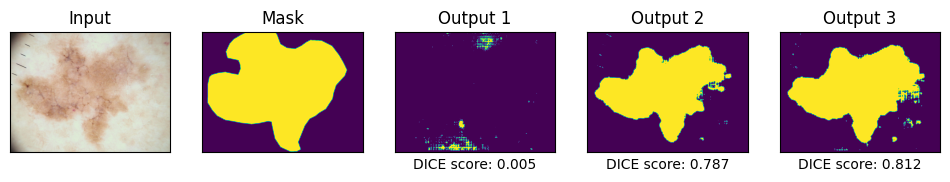

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
# Loop through each subplot and plot the corresponding image
for i, ax in enumerate(axes):
    if i==0:
        ax.set_title("Input")
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    if i==1:
        ax.set_title("Mask")
        ax.imshow(masks_split[0])
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    ax.set_title(f"Output {i-1}")
    ax.set_xlabel('DICE score: {:.3f}'.format(calculate_dice((masks[i-2]>0)*1, (masks_split[0]>0)*1)))
    ax.imshow(masks[i-2])
    ax.set_xticks([])
    ax.set_yticks([])

# Display the plot
plt.show()

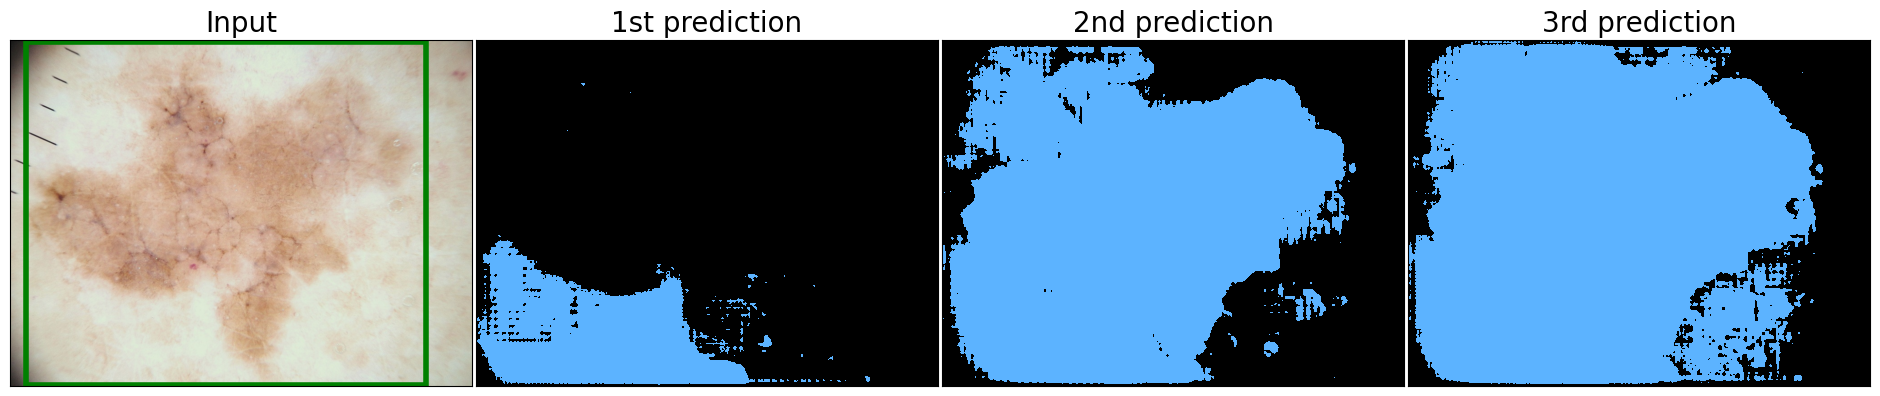

In [22]:
# Criar um colormap com preto para valores 0 e azul para valores 1
colors = ['#000000', '#5CB3FF']  # preto e azul
cmap = ListedColormap(colors)

font = 20
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 8))
# Loop through each subplot and plot the corresponding image
for i, ax in enumerate(axes):
    if i==0:
        ax.set_title("Input", fontsize=font)
        ax.imshow(image)
        utils.show_box(input_bb, ax, color='green')
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    if i==1:
        ax.set_title(f"1st prediction", fontsize=font)
    if i==2:
        ax.set_title(f"2nd prediction", fontsize=font)
    if i==3:
        ax.set_title(f"3rd prediction", fontsize=font)
    ax.imshow(masks[i-1], cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
fig.subplots_adjust(wspace=0.01)
# Display the plot
plt.show()

In [5]:
a = [1, 2]
b = [3, 4]

a + b

[1, 2, 3, 4]